### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


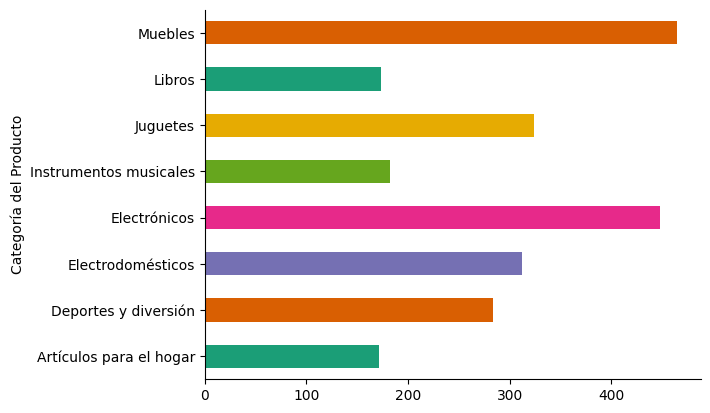

In [2]:
# @title Categoría del Producto

from matplotlib import pyplot as plt
import seaborn as sns
tienda.groupby('Categoría del Producto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#1. Análisis de facturación



In [3]:
# print(tienda.columns)
tienda_1_total = tienda['Precio'].sum()
tienda_2_total = tienda2['Precio'].sum()
tienda_3_total = tienda3['Precio'].sum()
tienda_4_total = tienda4['Precio'].sum()

print(f"La facturación total de la tienda 1 es de ${tienda_1_total}")
print(f"La facturación total de la tienda 2 es de ${tienda_2_total}")
print(f"La facturación total de la tienda 3 es de ${tienda_3_total}")
print(f"La facturación total de la tienda 4 es de ${tienda_4_total}")

La facturación total de la tienda 1 es de $1150880400.0
La facturación total de la tienda 2 es de $1116343500.0
La facturación total de la tienda 3 es de $1098019600.0
La facturación total de la tienda 4 es de $1038375700.0


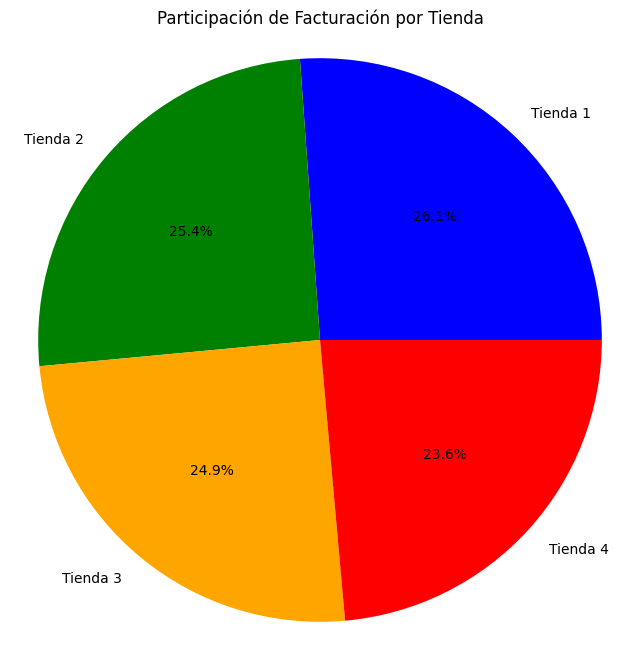

In [6]:
import matplotlib.pyplot as plt

# Facturación total por tienda


# Datos para el gráfico
facturaciones = [tienda_1_total, tienda_2_total, tienda_3_total, tienda_4_total]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['blue', 'green', 'orange', 'red']

# Gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(
    facturaciones,
    labels=nombres_tiendas,
    autopct='%1.1f%%',  # Mostrar porcentaje con 1 decimal
    colors=colores,
)

plt.title('Participación de Facturación por Tienda')
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()


# 2. Ventas por categoría

In [7]:
ventas_categoria_t1 = tienda.groupby("Categoría del Producto").size().sort_values(ascending=False)
ventas_categoria_t2 = tienda2.groupby("Categoría del Producto").size().sort_values(ascending=False)
ventas_categoria_t3 = tienda3.groupby("Categoría del Producto").size().sort_values(ascending=False)
ventas_categoria_t4 = tienda4.groupby("Categoría del Producto").size().sort_values(ascending=False)

In [8]:
print("Ventas por categoría - Tienda 1")
print(ventas_categoria_t1)
print("\nVentas por categoría - Tienda 2")
print(ventas_categoria_t2)
print("\nVentas por categoría - Tienda 3")
print(ventas_categoria_t3)
print("\nVentas por categoría - Tienda 4")
print(ventas_categoria_t4)


Ventas por categoría - Tienda 1
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
dtype: int64

Ventas por categoría - Tienda 2
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
dtype: int64

Ventas por categoría - Tienda 3
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
dtype: int64

Ventas por categoría - Tienda 4
Categoría del Pro

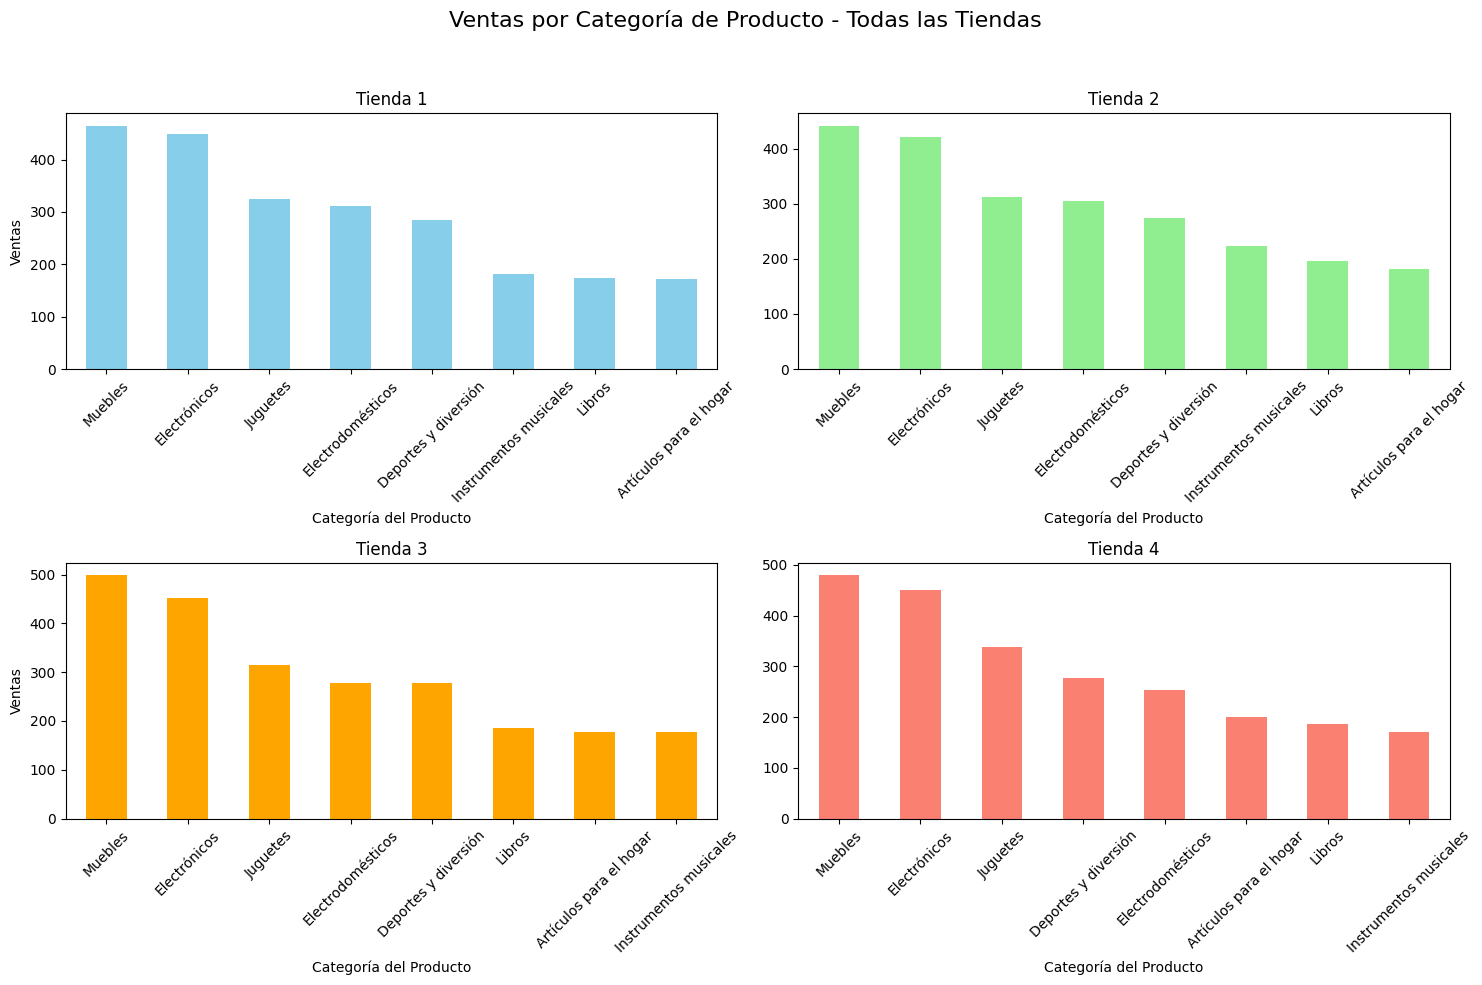

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Tienda 1
ventas_categoria_t1.plot(kind='bar', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Tienda 1')
axs[0, 0].set_ylabel('Ventas')
axs[0, 0].set_xticklabels(ventas_categoria_t1.index, rotation=45)

# Tienda 2
ventas_categoria_t2.plot(kind='bar', ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Tienda 2')
axs[0, 1].set_xticklabels(ventas_categoria_t2.index, rotation=45)

# Tienda 3
ventas_categoria_t3.plot(kind='bar', ax=axs[1, 0], color='orange')
axs[1, 0].set_title('Tienda 3')
axs[1, 0].set_ylabel('Ventas')
axs[1, 0].set_xticklabels(ventas_categoria_t3.index, rotation=45)

# Tienda 4
ventas_categoria_t4.plot(kind='bar', ax=axs[1, 1], color='salmon')
axs[1, 1].set_title('Tienda 4')
axs[1, 1].set_xticklabels(ventas_categoria_t4.index, rotation=45)

plt.suptitle('Ventas por Categoría de Producto - Todas las Tiendas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# 3. Calificación promedio de la tienda


In [10]:
promedio_calificacion_t1 = tienda["Calificación"].mean().round(2)
promedio_calificacion_t2 = tienda2["Calificación"].mean().round(2)
promedio_calificacion_t3 = tienda3["Calificación"].mean().round(2)
promedio_calificacion_t4 = tienda4["Calificación"].mean().round(2)

print("Calificación promedio - Tienda 1:", promedio_calificacion_t1)
print("Calificación promedio - Tienda 2:", promedio_calificacion_t2)
print("Calificación promedio - Tienda 3:", promedio_calificacion_t3)
print("Calificación promedio - Tienda 4:", promedio_calificacion_t4)



Calificación promedio - Tienda 1: 3.98
Calificación promedio - Tienda 2: 4.04
Calificación promedio - Tienda 3: 4.05
Calificación promedio - Tienda 4: 4.0


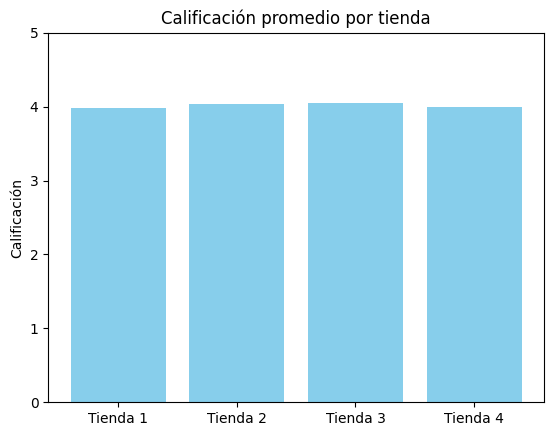

In [11]:
import matplotlib.pyplot as plt

# Calificaciones promedio
calificaciones = [promedio_calificacion_t1, promedio_calificacion_t2, promedio_calificacion_t3, promedio_calificacion_t4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.bar(tiendas, calificaciones, color='skyblue')
plt.title('Calificación promedio por tienda')
plt.ylabel('Calificación')
plt.ylim(0, 5)  # Escala de 1 a 5
plt.show()


# 4. Productos más y menos vendidos

In [12]:
ventas_producto_t1 = tienda["Producto"].value_counts()
ventas_producto_t2 = tienda2["Producto"].value_counts()
ventas_producto_t3 = tienda3["Producto"].value_counts()
ventas_producto_t4 = tienda4["Producto"].value_counts()

print("Tienda 1 - Más vendido:", ventas_producto_t1.idxmax(), "con", ventas_producto_t1.max(), "ventas")
print("Tienda 1 - Menos vendido:", ventas_producto_t1.idxmin(), "con", ventas_producto_t1.min(), "ventas")

print("Tienda 2 - Más vendido:", ventas_producto_t2.idxmax(), "con", ventas_producto_t2.max(), "ventas")
print("Tienda 2 - Menos vendido:", ventas_producto_t2.idxmin(), "con", ventas_producto_t2.min(), "ventas")

print("Tienda 3 - Más vendido:", ventas_producto_t3.idxmax(), "con", ventas_producto_t3.max(), "ventas")
print("Tienda 3 - Menos vendido:", ventas_producto_t3.idxmin(), "con", ventas_producto_t3.min(), "ventas")

print("Tienda 4 - Más vendido:", ventas_producto_t4.idxmax(), "con", ventas_producto_t4.max(), "ventas")
print("Tienda 4 - Menos vendido:", ventas_producto_t4.idxmin(), "con", ventas_producto_t4.min(), "ventas")


Tienda 1 - Más vendido: Microondas con 60 ventas
Tienda 1 - Menos vendido: Auriculares con micrófono con 33 ventas
Tienda 2 - Más vendido: Iniciando en programación con 65 ventas
Tienda 2 - Menos vendido: Juego de mesa con 32 ventas
Tienda 3 - Más vendido: Kit de bancas con 57 ventas
Tienda 3 - Menos vendido: Bloques de construcción con 35 ventas
Tienda 4 - Más vendido: Cama box con 62 ventas
Tienda 4 - Menos vendido: Guitarra eléctrica con 33 ventas


# 5. Envío promedio por tienda

In [13]:
promedio_envio_t1 = tienda["Costo de envío"].mean()
promedio_envio_t2 = tienda2["Costo de envío"].mean()
promedio_envio_t3 = tienda3["Costo de envío"].mean()
promedio_envio_t4 = tienda4["Costo de envío"].mean()

print("Costo de envío promedio - Tienda 1:", round(promedio_envio_t1, 2))
print("Costo de envío promedio - Tienda 2:", round(promedio_envio_t2, 2))
print("Costo de envío promedio - Tienda 3:", round(promedio_envio_t3, 2))
print("Costo de envío promedio - Tienda 4:", round(promedio_envio_t4, 2))



Costo de envío promedio - Tienda 1: 26018.61
Costo de envío promedio - Tienda 2: 25216.24
Costo de envío promedio - Tienda 3: 24805.68
Costo de envío promedio - Tienda 4: 23459.46


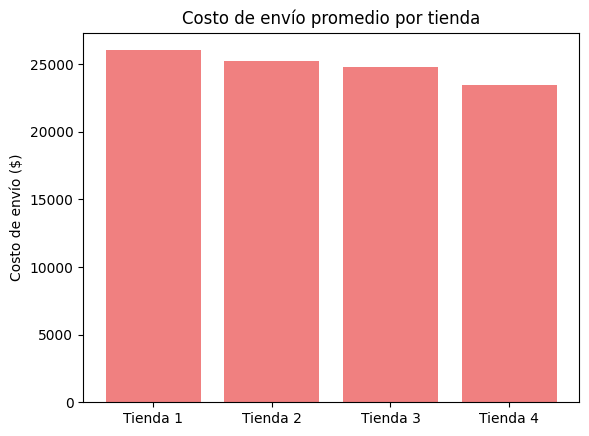

In [14]:
import matplotlib.pyplot as plt

# Promedios de envío
costos_envio = [promedio_envio_t1, promedio_envio_t2, promedio_envio_t3, promedio_envio_t4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.bar(tiendas, costos_envio, color='lightcoral')
plt.title('Costo de envío promedio por tienda')
plt.ylabel('Costo de envío ($)')
plt.show()


# 🧾 Informe de Desempeño – Evaluación de Tiendas

## 📌 Introducción

Este informe tiene como objetivo evaluar el rendimiento de cuatro tiendas a través del análisis de indicadores clave como:

- Facturación total  
- Categorías de productos más vendidos  
- Calificaciones promedio de clientes  
- Productos más y menos vendidos  
- Costos logísticos (envío)

El análisis permitirá identificar cuál tienda presenta el desempeño más débil y, en consecuencia, cuál debería ser cerrada para optimizar recursos.

---

## 📊 Comparativa de Indicadores Clave

### 💰 Facturación Total

| Tienda   | Facturación Total ($)     |
|----------|----------------------------|
| Tienda 1 | 1,150,880,400.00           |
| Tienda 2 | 1,116,343,500.00           |
| Tienda 3 | 1,098,019,600.00           |
| Tienda 4 | 1,038,375,700.00           |

📉 **Tienda 4 tiene la menor facturación total**, con una diferencia de más de $112 millones respecto a la Tienda 1.

---

### 🧩 Categorías Más Vendidas

Todas las tiendas tienen una distribución similar de ventas por categoría, pero en volumen:

- **Tienda 3** lidera en ventas de *Muebles* (499 unidades).
- **Tienda 4** tiene el menor volumen total, con muchas categorías por debajo de las 300 ventas.

---

### ⭐ Calificaciones Promedio de Clientes

| Tienda   | Calificación Promedio |
|----------|------------------------|
| Tienda 1 | 3.98                   |
| Tienda 2 | 4.04                   |
| Tienda 3 | 4.05                   |
| Tienda 4 | 4.00                   |

Aunque ninguna tienda tiene una calificación mala, **la Tienda 1 se ubica en último lugar** en este aspecto.

---

### 📦 Productos Más y Menos Vendidos

| Tienda   | Producto Más Vendido (ventas)   | Producto Menos Vendido (ventas)   |
|----------|----------------------------------|------------------------------------|
| Tienda 1 | Microondas (60)                 | Auriculares con micrófono (33)     |
| Tienda 2 | Iniciando en programación (65)  | Juego de mesa (32)                 |
| Tienda 3 | Kit de bancas (57)              | Bloques de construcción (35)       |
| Tienda 4 | Cama box (62)                   | Guitarra eléctrica (33)            |

🟡 La diferencia entre productos más y menos vendidos es similar en todas, aunque **la Tienda 4 presenta menor variedad**.

---

### 🚚 Costo Promedio de Envío

| Tienda   | Costo Promedio de Envío ($) |
|----------|-----------------------------|
| Tienda 1 | 26,018.61                   |
| Tienda 2 | 25,216.24                   |
| Tienda 3 | 24,805.68                   |
| Tienda 4 | 23,459.46                   |

📦 **La Tienda 4 tiene el costo de envío más bajo**, lo cual es un punto fuerte.

---

## 📉 Análisis Combinado y Conclusión

Aunque la **Tienda 4** tiene un costo de envío bajo y una calificación promedio aceptable, es la tienda con **menor rendimiento global**:

- Menor facturación total.  
- Volumen de ventas más bajo por categoría.  
- A pesar de tener un producto más vendido con buen volumen (Cama box con 62 ventas), **no compensa su bajo rendimiento general**.  
- Su menor variedad en ventas por categoría sugiere menor penetración de mercado o rotación de inventario.

---

## 🛑 Recomendación: Cerrar la **Tienda 4**

Con base en todos los datos proporcionados:

- **Tienda 1** tiene la mejor facturación.  
- **Tienda 3** tiene la mejor calificación promedio.  
- **Tienda 2** mantiene un rendimiento intermedio y balanceado.  
- **Tienda 4**, en cambio, queda rezagada en ingresos, volumen y diversidad de ventas, lo que representa un uso poco eficiente de los recursos.

👉 **Se recomienda el cierre de la Tienda 4** para redirigir esfuerzos y recursos hacia las tiendas con mayor rentabilidad y potencial de crecimiento.

